<a href="https://colab.research.google.com/github/Purple-cherry-blossoms/hands-on-projects/blob/main/Tsproject_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Pandas Library

In [ ]:
import pandas as pd

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Load data
data = pd.read_csv('/content/drive/MyDrive/Python Learning/ds_salaries.csv')

Mounted at /content/drive


In [ ]:
# Created sample data.copy to perform drudgery work to avoid errors on actual
# data
#data_copy = data.copy()


Data Exploration


In [ ]:
#Using to check for sum of missing values
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
#Using data.info to get the sum overview of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
data.tail(20) #This is the original datasets


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3736,2021,MI,FT,Data Analyst,75000,USD,75000,US,0,US,L
3737,2021,MI,FT,Data Analyst,62000,USD,62000,US,0,US,L
3738,2021,MI,FT,Data Scientist,73000,USD,73000,US,0,US,L
3739,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
3740,2020,SE,FT,Data Science Manager,190200,USD,190200,US,100,US,M
3741,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S


# **Data Analysation and expanding of column distribution**


In [ ]:
pip install pycountry forex-python #installed the library to convert the currency and country codes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.7 MB/s eta 0:00:00


In [ ]:

import pycountry
from forex_python.converter import CurrencyCodes



# Convert to DataFrame
data = pd.DataFrame(data)

# Initialize CurrencyCodes class from forex-python
c = CurrencyCodes()

# Convert ISO 4217 currency code to full currency name
def get_currency_name(currency_code):
    currency_name = c.get_currency_name(currency_code)
    return currency_name if currency_name else currency_code  # Return original code if unknown

# Convert ISO 3166 country code to full country name
def get_country_name(country_code):
    try:
        country = pycountry.countries.get(alpha_2=country_code)
        return country.name if country else country_code  # Return original code if unknown
    except AttributeError:
        return country_code  # Return original code if unknown

# Mappings for experience level, employment type, and company size
experience_level_mapping = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive'
}

employment_type_mapping = {
    'FT': 'Full Time',
    'PT': 'Part Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

company_size_mapping = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Apply conversions and mappings
data['salary_currency'] = data['salary_currency'].apply(get_currency_name)
data['employee_residence'] = data['employee_residence'].apply(get_country_name)
data['company_location'] = data['company_location'].apply(get_country_name)

data['experience_level'] = data['experience_level'].map(experience_level_mapping).fillna(data['experience_level'])
data['employment_type'] = data['employment_type'].map(employment_type_mapping).fillna(data['employment_type'])
data['company_size'] = data['company_size'].map(company_size_mapping).fillna(data['company_size'])

# Display updated DataFrame
print(data)


      work_year experience_level employment_type                 job_title  \
0          2023     Senior Level       Full Time  Principal Data Scientist   
1          2023        Mid Level        Contract               ML Engineer   
2          2023        Mid Level        Contract               ML Engineer   
3          2023     Senior Level       Full Time            Data Scientist   
4          2023     Senior Level       Full Time            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020     Senior Level       Full Time            Data Scientist   
3751       2021        Mid Level       Full Time  Principal Data Scientist   
3752       2020      Entry Level       Full Time            Data Scientist   
3753       2020      Entry Level        Contract     Business Data Analyst   
3754       2021     Senior Level       Full Time      Data Science Manager   

       salary       salary_currency  salary_in_usd employee_res

In [ ]:
data.shape

(3755, 11)

# **Prepared General Analysis**

In [ ]:

pd.set_option('display.float_format', lambda x: '%.2f' % x) #conversion from scientific notation to standard decimal
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


# **Data Visualisation and outliers**

```

```



In [ ]:
import matplotlib.pyplot as plt    #for visualisation
import seaborn as sns

<Axes: >

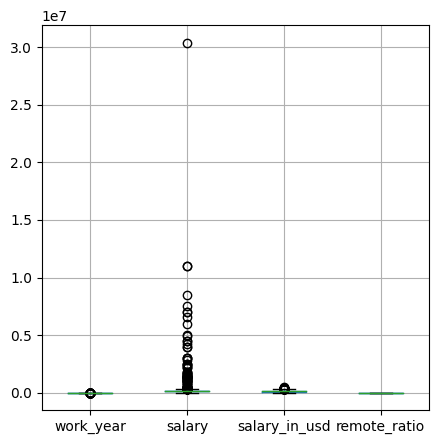

In [ ]:
data.boxplot(figsize=(5,5))

In [ ]:
#using inter quatile range to get rid of missing values
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker)
print(Upper_Whisker)

-20000.0
300000.0


In [ ]:
#removing outliers below the lower_whisker and above the Upper_whisker
data = data[data['salary'] < Upper_Whisker]
data = data[data['salary'] > Lower_Whisker]

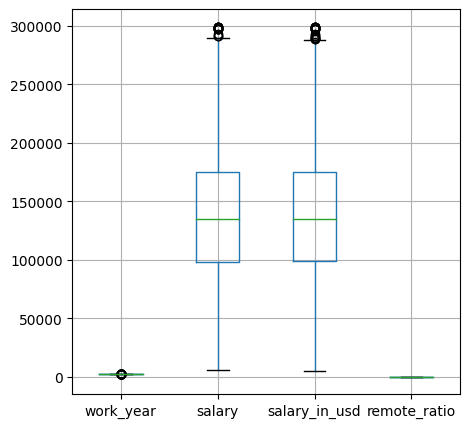

In [ ]:
boxplot = data.boxplot(figsize=(5,5))


<Axes: xlabel='salary'>

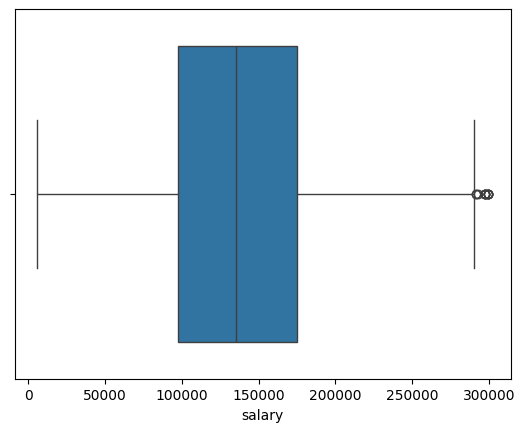

In [ ]:

sns.boxplot(data = data, x= data['salary']) #visualization of datasets after removal of outliers

# **Analysis And Visualisation of Salary**

In [ ]:
#Create a DataFrame from the dictionary
data = pd.DataFrame(data)
#Group by work_year and calculate the sum of salaries
salary_per_year = data.groupby('work_year')['salary'].sum().reset_index()

# Sum of Salary Per Year

In [ ]:
print(salary_per_year)

   work_year     salary
0       2020    5382809
1       2021   20656551
2       2022  214712972
3       2023  255007703


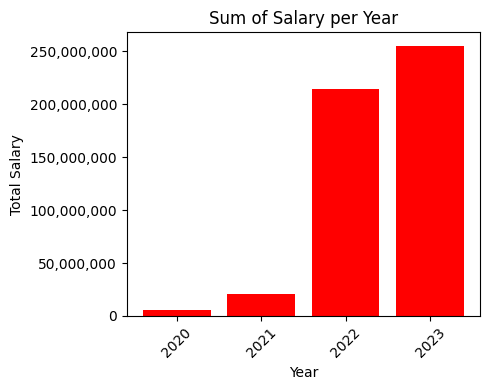

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(salary_per_year['work_year'], salary_per_year['salary'], color='red')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.title('Sum of Salary per Year')
def no_decimal(x, pos):
    return '{:,.0f}'.format(x) # Format with no decimal places
years = salary_per_year['work_year'].astype(int)  # Convert years to integers
plt.xticks(ticks=years, labels=years, rotation=45)  # Set x-axis ticks to integers and rotate labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(no_decimal)) ## Format y-axis to remove decimal points
plt.tight_layout()
plt.show()

#**Total Job Title Count**

In [ ]:
job_counts =data['job_title'].value_counts()

In [ ]:
print(job_counts)

job_title
Data Engineer                          1017
Data Scientist                          810
Data Analyst                            604
Machine Learning Engineer               280
Analytics Engineer                      103
                                       ... 
Compliance Data Analyst                   1
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 88, dtype: int64


# Showing All Job titles

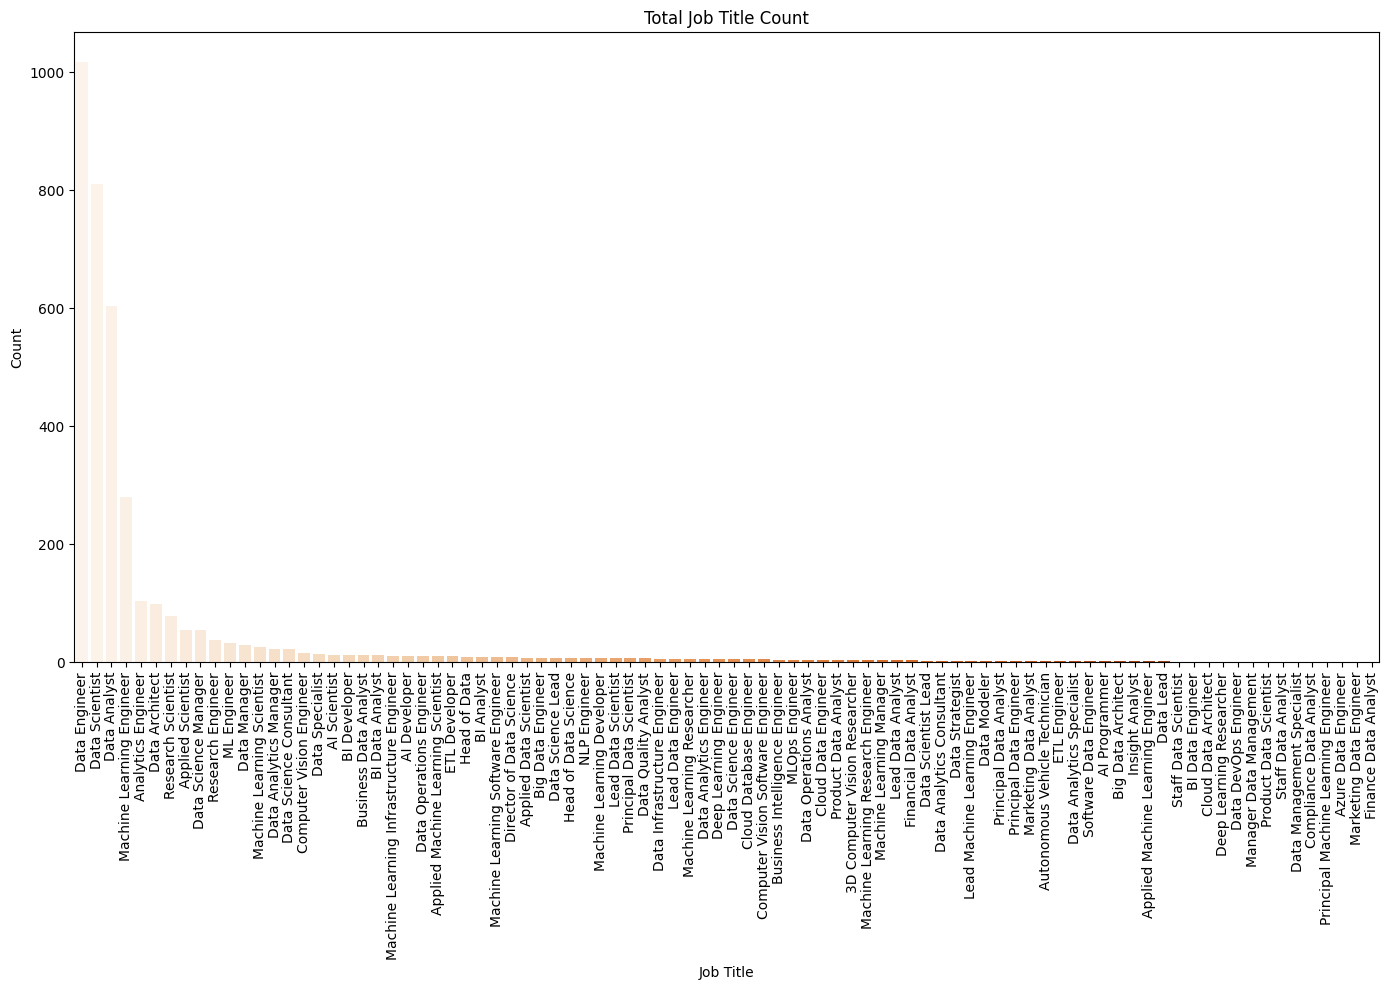

In [ ]:
# Convert to DataFrame
data = pd.DataFrame(data)

# Calculate the count of each job title
job_title_counts = data['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Plot the total job title count
plt.figure(figsize=(14, 10))

# Create a bar plot for job title counts
sns.barplot(x='Job Title', hue= 'Job Title', y='Count', data=job_title_counts, palette='Oranges', legend = False)

# Plot settings
plt.title('Total Job Title Count')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()

# Showing Top 20

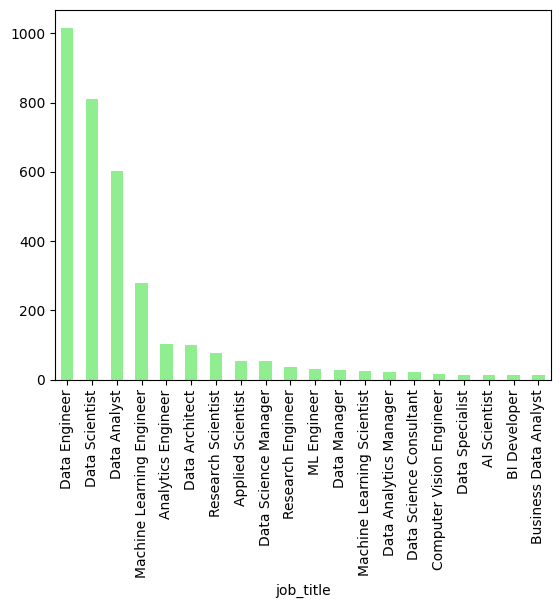

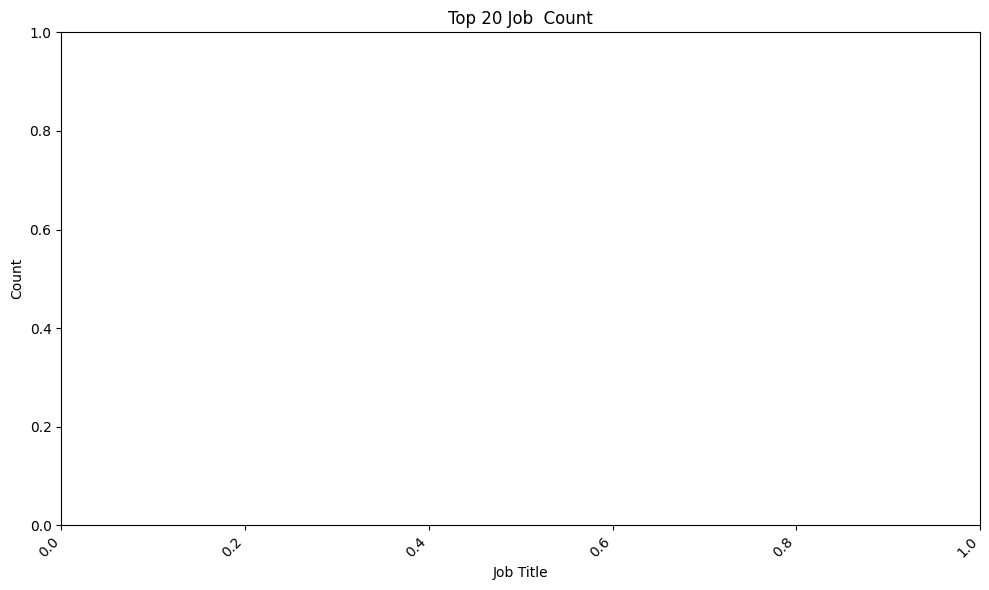

In [ ]:
top_n = 20
job_counts.head(top_n).plot(kind='bar', color='lightgreen')

# Increase figure size and rotate x-axis labels
plt.figure(figsize=(10, 6))
plt.title(f'Top {top_n} Job  Count')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# **Distribution Salaries(USD) By Job Title**

Salary Distribution Statistics by Job Title:
                        job_title  count  Average Salary  Standard Deviation  \
0   3D Computer Vision Researcher   3.00        26666.67            20816.66   
1                    AI Developer  10.00       120332.70            83508.79   
2                   AI Programmer   2.00        55000.00            21213.20   
3                    AI Scientist  13.00        98011.62            78709.52   
4              Analytics Engineer 103.00       152368.63            53838.47   
..                            ...    ...             ...                 ...   
83              Research Engineer  37.00       163108.38            55055.42   
84             Research Scientist  78.00       150763.64            59019.78   
85         Software Data Engineer   2.00        62510.00            17691.81   
86             Staff Data Analyst   1.00        15000.00                 NaN   
87           Staff Data Scientist   1.00       105000.00                 Na

<ipython-input-25-5be06047e41b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='job_title', y='salary_in_usd', data=data, palette='Set2')


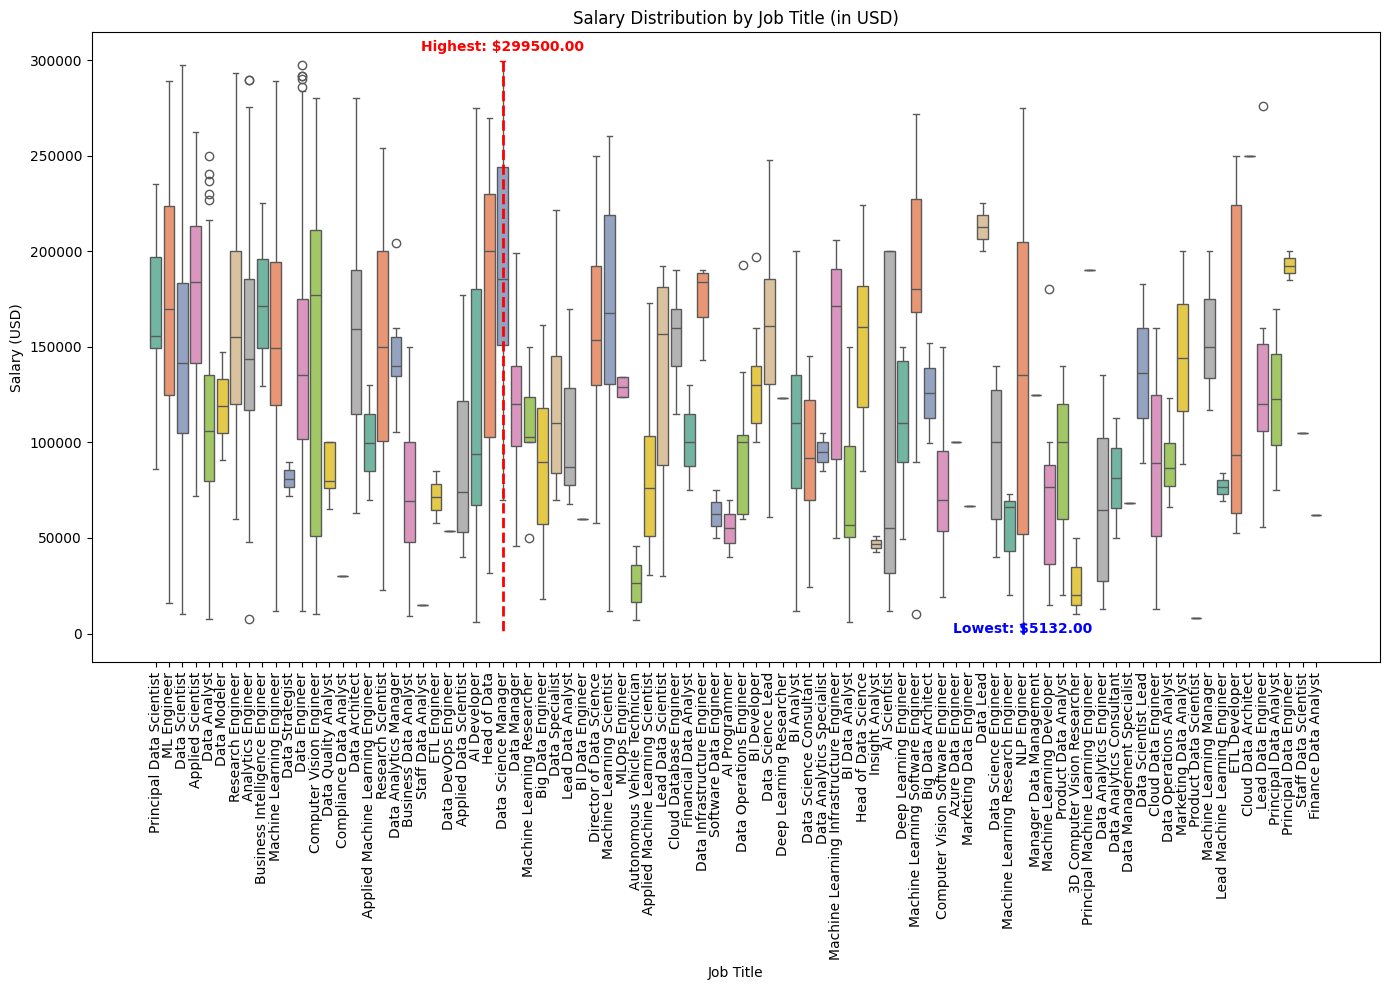

In [ ]:


# Convert to DataFrame
data = pd.DataFrame(data)

# Group by 'job_title' and calculate distribution statistics
salary_stats = data.groupby('job_title')['salary_in_usd'].describe().reset_index()
salary_stats.rename(columns={
    'mean': 'Average Salary',
    'std': 'Standard Deviation',
    '50%': 'Median Salary',
    'min': 'Minimum Salary',
    'max': 'Maximum Salary'
}, inplace=True)

# Print statistics
print("Salary Distribution Statistics by Job Title:")
print(salary_stats)

# Find the job title with the highest and lowest salaries
highest_salary_row = salary_stats.loc[salary_stats['Maximum Salary'].idxmax()]
lowest_salary_row = salary_stats.loc[salary_stats['Minimum Salary'].idxmin()]

highest_job_title = highest_salary_row['job_title']
highest_salary = highest_salary_row['Maximum Salary']

lowest_job_title = lowest_salary_row['job_title']
lowest_salary = lowest_salary_row['Minimum Salary']

# Plot the distribution of salaries by job title
plt.figure(figsize=(14, 10))

# Create a box plot for salary distribution by job title
box_plot = sns.boxplot(x='job_title', y='salary_in_usd', data=data, palette='Set2')

# Add annotations for the highest and lowest salaries
plt.text(
    data['job_title'].unique().tolist().index(highest_job_title),
    highest_salary + 5000,  # Adjust position of the annotation
    f'Highest: ${highest_salary:.2f}',
    color='red',
    ha='center',
    weight='bold'
)

plt.text(
    data['job_title'].unique().tolist().index(lowest_job_title),
    lowest_salary - 5000,  # Adjust position of the annotation
    f'Lowest: ${lowest_salary:.2f}',
    color='blue',
    ha='center',
    weight='bold'
)

# Get the x-axis positions for the highest and lowest salary job titles
highest_job_title_index = data['job_title'].unique().tolist().index(highest_job_title)
lowest_job_title_index = data['job_title'].unique().tolist().index(lowest_job_title)

# Draw a line connecting the highest salary to its job title
plt.plot([highest_job_title_index, highest_job_title_index], [highest_salary, 0], color='red', linestyle='--', linewidth=2)

# Draw a line connecting the lowest salary to its job title
plt.plot([lowest_job_title_index, lowest_job_title_index], [lowest_salary, 0], color='blue', linestyle='--', linewidth=2)

# Highlight the box plot elements for highest and lowest salaries
for line in box_plot.lines:
    ydata = line.get_ydata()

    # Ensure ydata has values and we are dealing with quartiles
    if len(ydata) > 0:
        # Highlight the highest salary (max)
        if ydata[0] == highest_salary:
            line.set_color('red')  # Highlight highest salary in red

        # Highlight the lowest salary (min)
        if ydata[0] == lowest_salary:
            line.set_color('blue')  # Highlight lowest salary in blue

# Plot settings
plt.title('Salary Distribution by Job Title (in USD)')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


#Top 20 most frequent Job titles

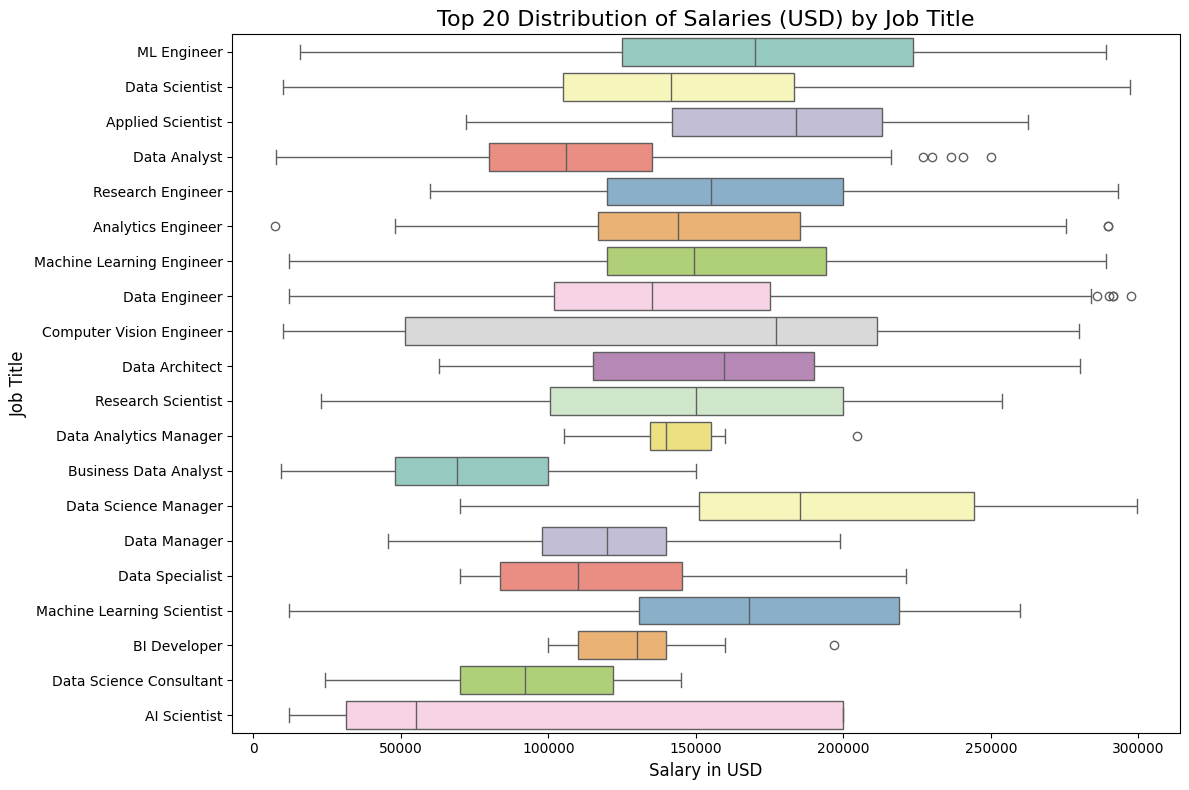

In [ ]:
# Limit to the top 20 most frequent job titles (or adjust as necessary)
top_job_titles = data['job_title'].value_counts().nlargest(20).index

# Filter the dataframe to only include the top job titles
data_filtered = data[data['job_title'].isin(top_job_titles)]

# Set figure size
plt.figure(figsize=(12, 8))

# Create a box plot to show salary distribution by job title
sns.boxplot(x='salary_in_usd', y='job_title', hue= 'job_title' , data=data_filtered, palette='Set3', legend=False)

# Mark plot title and labels
plt.title('Top 20 Distribution of Salaries (USD) by Job Title', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Analysis And Visualisation Of Average Salaries And Highest Paying Company**

Average Salaries by Company Location:
        Company Location  Average Salary
0                Albania        10000.00
1                Algeria       100000.00
2         American Samoa        35000.00
3              Argentina        25000.00
4                Armenia        50000.00
..                   ...             ...
64               Ukraine        57850.00
65  United Arab Emirates       100000.00
66        United Kingdom        70354.03
67         United States       148909.53
68              Viet Nam        12000.00

[69 rows x 2 columns]

Highest Paying Company Location:
Puerto Rico with an average salary of $167500.00


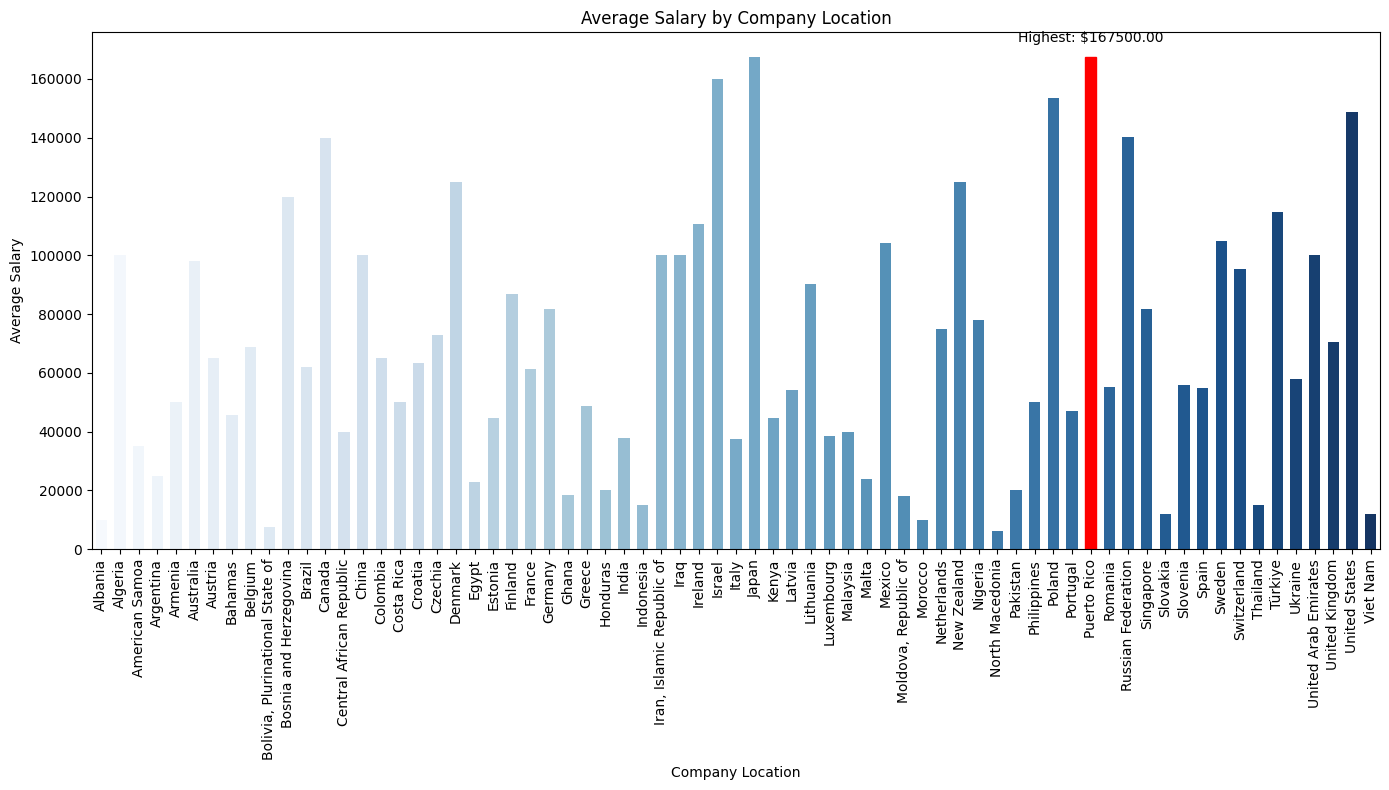

In [ ]:
# Convert to DataFrame
data = pd.DataFrame(data)

# Group by 'company_location' and calculate the average salary
average_salaries = data.groupby('company_location')['salary'].mean().reset_index()
average_salaries.columns = ['Company Location', 'Average Salary']

# Find the company location with the highest average salary
highest_paying_company = average_salaries.loc[average_salaries['Average Salary'].idxmax()]
highest_average_salary = highest_paying_company['Average Salary']
highest_company_location = highest_paying_company['Company Location']

# Print the results
print("Average Salaries by Company Location:")
print(average_salaries)
print("\nHighest Paying Company Location:")
print(f"{highest_company_location} with an average salary of ${highest_average_salary:.2f}")

# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(14, 8))
sns.barplot(x='Company Location', y='Average Salary', hue= 'Company Location' , data=average_salaries, width=0.6, palette = 'Blues', legend = False)

# Highlight the highest paying company
highlight_color = 'red'
for i, bar in enumerate(plt.gca().patches):
    if average_salaries['Company Location'][i] == highest_company_location:
        bar.set_color(highlight_color)

# Label the bar with the highest salary
plt.text(average_salaries.index[average_salaries['Company Location'] == highest_company_location][0],
         highest_average_salary + 5000,
         f'Highest: ${highest_average_salary:.2f}', color='black', ha="center")

# Plot settings
plt.title('Average Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
